# Overview and Introduction 

## General Information 

## Description dataset
The "group 1.csv" file was used for this project. 
It contains 10 feature columns (x1 - x10) and one target column (y). In total the file contains 10000 rows (10000 rows * 11 columns). 


## Goal of the project
The aim of this project is to apply learnt machine learning methods and to use them to extract and find new information about the dataset. First of all general information about the dataset was extracted , the data was split into training and test splits, visualisations are done and outliers were investigated. Once a good overview of the data set had been obtained, the following methods were chosen: 

- Linear Regression
- KNN 
- MLP Regression 
- Epsilon SVM 

After all methods were applied and the parameter were tuned, the results are presented. 


# Setup 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as ss
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category= UserWarning)

In [2]:
import utils as util

In [117]:
df =  pd.read_csv("group 1.csv")

In [118]:
# reset the structure of the dataframe
data_long = df.reset_index().melt(id_vars=['index', 'y'], var_name='variable', value_name='values')

# Data Description
## Statistics
- Correlation of target y and features x1:x10 : 
  - highest positive correlation between y and x4 
  - low positive correlation between y and x1, x2 and x5
  - hardly a correlation between y and x6 and x7
  - no correlation between y and x3, x8, x9 and x10
  - these results are also shown in the scatterplot of the correlations
- Covariance of target y and features x1:x10 :
  - the results of the covariance reflect the results of the correlation
  - y and x1 have a high covariance 
  - positive covariance of y and x1, x2 and x5
  - negative value for y and x8 
 

In [6]:
corrY = df.corr()['y']

In [7]:
covY = df.cov()['y']

### Visualisation

<AxesSubplot: ylabel='variable'>

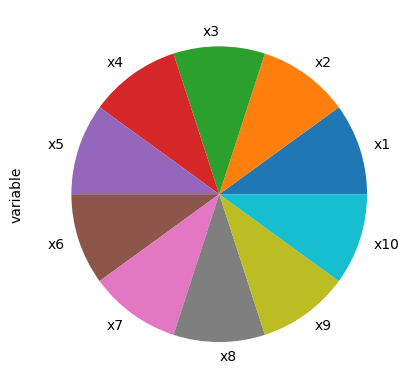

In [8]:
# pie plot of the distribution of the features
data_long['variable'].value_counts().plot(kind="pie", ylabel="variable")

#### Scatter plots of the correlation of features and target
Only taking 100 samples of our dataset since 10000 samples are too much to see the plots

In [9]:
data_long_rep = df[0:100].reset_index().melt(id_vars=['index', 'y'], var_name='variable', value_name='value')
data_long_rep
px.scatter(data_long_rep, x='value', y='y', facet_col='variable', facet_col_wrap=4,
           height=800, trendline="ols").update_xaxes(matches=None)

Feature Importance in Linear Model and Correlation

In [116]:
# the cells with linear model initialization must be executed first
importance = lm.coef_

[Text(0.5, 25.0, 'Features'),
 Text(25.078125, 0.5, 'Feature importance of linear model'),
 Text(0.5, 1.0, 'Featuer importance of linear model')]

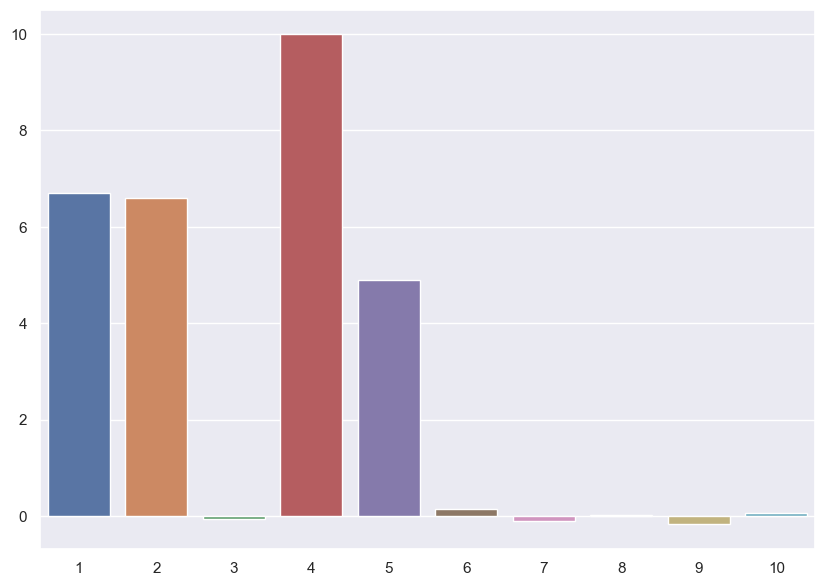

In [103]:
importanceplot = sns.barplot(x=[x+1 for x in range(len(corrY)-1)], y=importance)
corrplot.set(xlabel ="Features", ylabel = "Feature importance of linear model", title ='Featuer importance of linear model')

[Text(0.5, 0, 'Features'),
 Text(0, 0.5, 'Correlation to y'),
 Text(0.5, 1.0, 'Features to y correlation')]

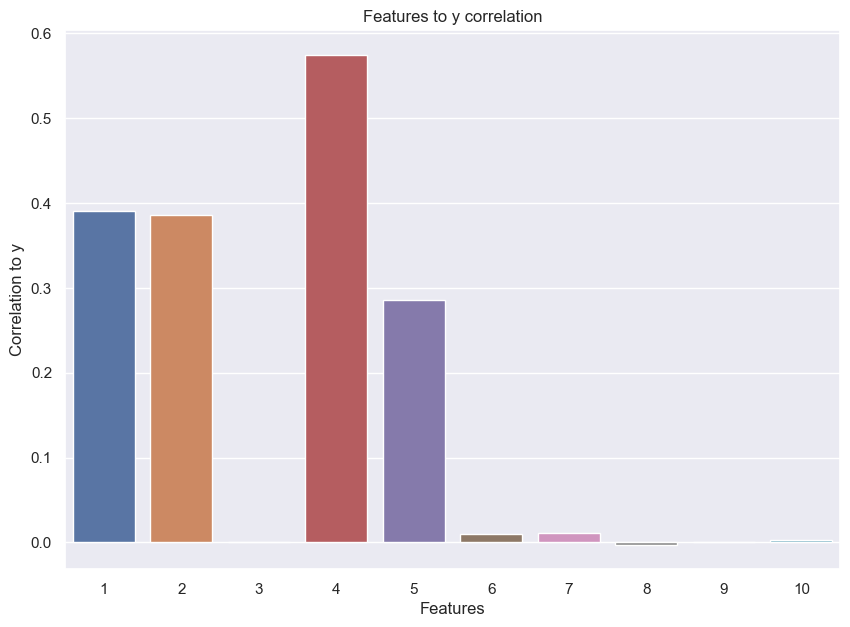

In [102]:
corrplot = sns.barplot(x=[x+1 for x in range(len(corrY)-1)], y=corrY[:-1])
corrplot.set(xlabel ="Features", ylabel = "Correlation to y", title ='Features to y correlation')

### Boxplots

In [108]:
data_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['x1', 'x2', 'x3','x4', 'x5', 'x6','x7', 'x8', 'x9','x10'])
data_melt.columns =['index', 'features', 'value']

<function matplotlib.pyplot.show(close=None, block=None)>

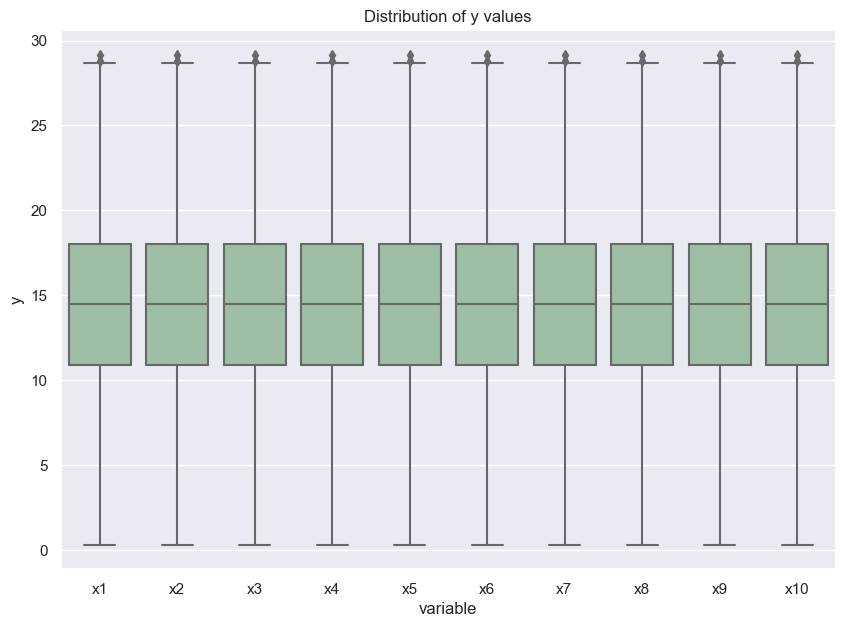

In [109]:
sns.set(rc={"figure.figsize":(10,7)})
ax=sns.boxplot(x='variable', y='y', data=data_long, color='#99c2a2')
plt.title("Distribution of y values")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

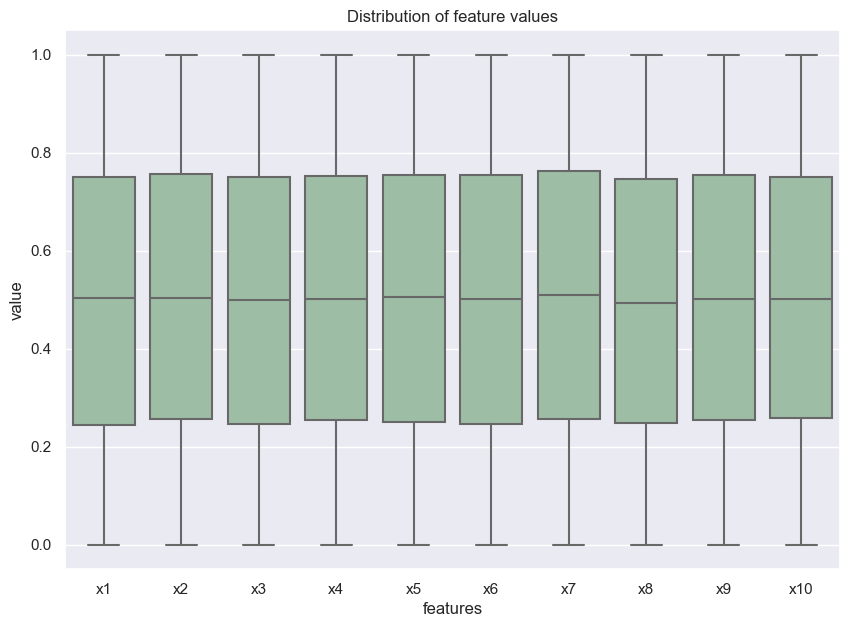

In [110]:
sns.set(rc={"figure.figsize":(10, 7)})
ax = sns.boxplot(x='features', y='value', data=data_melt, color='#99c2a2')
plt.title("Distribution of feature values")
plt.show

# Train and Test splits
Data is split into train, validation and test, for parameter tuning and performance evaluation.

In [12]:
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size= 0.5, random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size= 0.6, random_state=25)

X_cross = np.concatenate((X_train, X_val))
y_cross = np.concatenate((y_train, y_val))

## Same with dropped columns
Which columns to drop was analyzed further down in the file with correlation/covariance and feature importance of a linear model

In [14]:
df_dropped_cols = df.drop(['x3', 'x6', 'x7', 'x8', 'x9', 'x10'], axis='columns')
X_dropped = np.array(df_dropped_cols.iloc[:,:-1])
y_dropped = np.array(df_dropped_cols.iloc[:,-1])

X_train_dropped, X_other_dropped, y_train_dropped, y_other_dropped = train_test_split(X_dropped, y_dropped, test_size= 0.4, random_state=25)
X_val_dropped, X_test_dropped, y_val_dropped, y_test_dropped = train_test_split(X_other_dropped, y_other_dropped, test_size= 0.5, random_state=25)

X_cross_dropped = np.concatenate((X_train_dropped, X_val_dropped))
y_cross_dropped = np.concatenate((y_train_dropped, y_val_dropped))

In [15]:
X_train.shape, X_test.shape, X_val.shape, X_cross.shape

((5000, 10), (3000, 10), (2000, 10), (7000, 10))

## Outlier Detection
By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

The higher the negative outlier factor, the more "normal". 

### Outliers in Training data: 

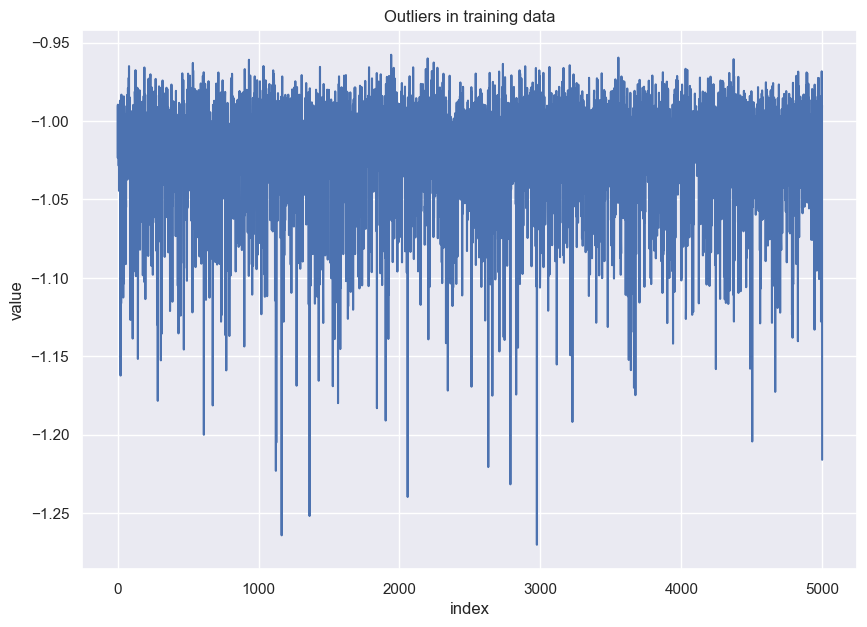

In [111]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(X_train)
nof = clf.negative_outlier_factor_
outliers = [x for x in nof if x < -1.2]

indices = []
for i in outliers: 
    index = np.where(nof == i)
    indices.append(index[0][0])
    
plt.title("Outliers in training data")
plt.xlabel("index")
plt.ylabel("value")
plt.plot(nof)


### Outliers in test data 

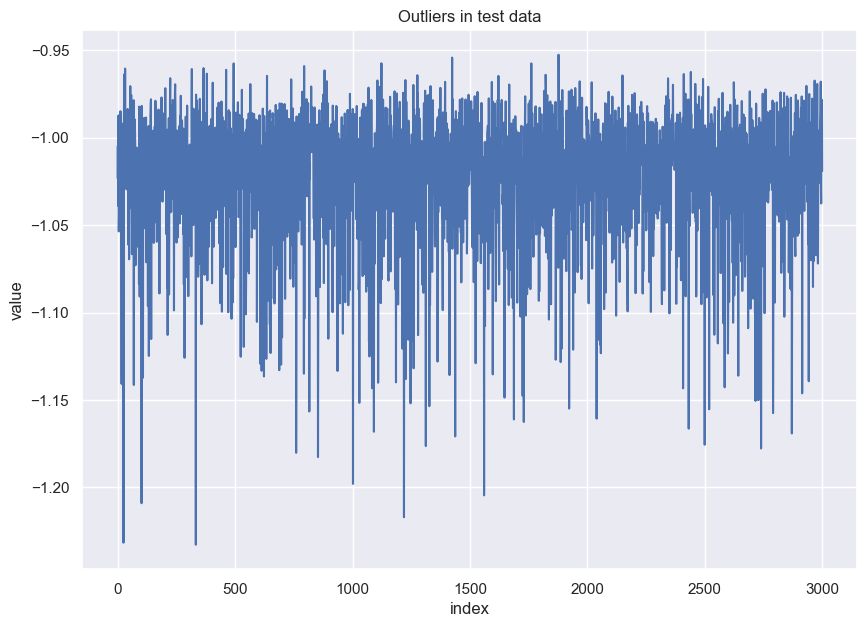

In [112]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(X_test)
nof = clf.negative_outlier_factor_
outliers = [x for x in nof if x < -1.2]

indices = []
for i in outliers: 
    index = np.where(nof == i)
    indices.append(index[0][0])
    
plt.xlabel("index")
plt.ylabel("value")
plt.title("Outliers in test data")
plt.plot(nof)

# Methods
- Applied Methods: Linear Regression, KNN, MLP Regression, Epsilon SVM 
- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://scikit-learn.org/stable/modules/classes.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
- Parameter Tuning
- Cross Validation
- Grid Search
- Tools and Libraries 


## Linear Models
### Linear regression
Linear regression model trained by using the training data set. For performance/error evaluation the trained model is used for predicting the validation data set.
- Mean squared error (MSE): training MSE is slightly better than with validation data.
- R²: training R² better than with validation data, by 0.01133689.
- Mean absolute error (MAE): slightly better performance with training data than with validation data.

In [115]:
# Linear Regression, with all data 
from sklearn.linear_model import LinearRegression

lm= LinearRegression()
lm.fit(X_train, y_train)

y_train_est= lm.predict(X_train)
y_val_est = lm.predict(X_val)
predictions = lm.predict(X)

util.export_model_string(lm, df.columns)
util.print_model_statistics(y_train, y_train_est, y_val, y_val_est)

#scatter plot of train and validation
fig = go.Figure()

fig.update_layout(title="Linear Regression model", xaxis_title="Target values", yaxis_title = "Estimated values", height=600, width=600)

fig.add_trace(go.Scatter(x=y_train, y= y_train_est, mode="markers", line=go.scatter.Line(color="blue"), showlegend=True, name="Train"))

fig.add_trace(go.Scatter(x=y_val, y= y_val_est, mode= "markers", line=go.scatter.Line(color="red"), showlegend=True, name="Validation"))


Train MSE: 6.790550203134987
Test MSE: 6.5002200888214725

Train R²: 0.7220667168348986
Test R²: 0.7326885853062073

Train MAE: 2.0145654369883705
Test MAE: 1.9901112548244717



### Lasso Regularization: Linear Regression Model
Using the Lasso Regularization for feature selection, by adding a penalty to the model with high variance, thereby shrinking the beta coefficients to zero. <br> Result:
- Lasso Regularization with alpha = 1 and max_iter = 10000 results in poor results
- Grid Search with different parameters results in an alpha = 0 and max_iter = 10000, which means that the Lasso Regularization does not work for this model.

In [21]:
# Lasso Regularization for linear regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(alpha= 1, max_iter=10000)
lasso.fit(X_train, y_train)

lasso_y_train_est = lasso.predict(X_train)
lasso_y_val_est = lasso.predict(X_val)

print("Result: Lasso Regularization with fixed alpha = 1 and max_iter = 10000\n")
util.print_model_statistics(y_train, lasso_y_train_est, y_val, lasso_y_val_est)

# grid search to find best parameters for lasso
parameters= {
    "alpha": [ 0, 0.5, 0.7, 1, 100],
    "max_iter": [100, 1000, 10000]
}

gs = GridSearchCV(lasso, parameters, cv= 5, n_jobs= -1, return_train_score=True)
gs.fit(X_train, y_train)

print("\nGrid search to find best parameter settings for Lasso Regularization\n")
print("Best parameters" + str(gs.best_params_)+ "\n")

best_rf = gs.best_estimator_
rf_train = best_rf.predict(X_train)
rf_val = best_rf.predict(X_val)


util.print_model_statistics(y_train, rf_train, y_val, rf_val)

Result: Lasso Regularization with fixed alpha = 1 and max_iter = 10000

Train MSE: 24.432303054187223
Test MSE: 24.31709171328436

Train R²: 0.0
Test R²: -2.4765769550683103e-06

Train MAE: 4.042819801578794
Test MAE: 3.9991902887509947


Grid search to find best parameter settings for Lasso Regularization

Best parameters{'alpha': 0, 'max_iter': 100}

Train MSE: 6.790550203134987
Test MSE: 6.50022008882147

Train R²: 0.7220667168348986
Test R²: 0.7326885853062073

Train MAE: 2.0145654369883705
Test MAE: 1.9901112548244715



### Linear Regression Model: Polynomial Features
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

<br> Using sklearn.pipeline and GridSearch to find best parameters/degree for polynomial features on linear regression.
<br> Result:
- polynomial features of degree 3 leads to the best results in train and validation data

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

grid_params = {
    'poly__degree': (2,3,4),
    'poly__interaction_only': (True, False),
    'poly__include_bias': (True, False)
}

gs_2 = GridSearchCV(polynomial_pipeline, grid_params)

# Fit model to our training data
gs_2.fit(X_train, y_train)

print("\nGrid search to find best parameter settings for Linear Regression Polynomial Features\n")
print("Best parameters" + str(gs_2.best_params_)+ "\n")

# get best parameter setting and make predict
best_rf = gs_2.best_estimator_
rf_train = best_rf.predict(X_train)
rf_val = best_rf.predict(X_val)

util.print_model_statistics(y_train, rf_train, y_val, rf_val)

#scatter plot of train and validation
fig = go.Figure()

fig.update_layout(title="Linear Regression with Polynomial Features", xaxis_title="Target values", yaxis_title = "Estimated values", height=600, width=600)

fig.add_trace(go.Scatter(x=y_train, y= rf_train, mode="markers", line=go.scatter.Line(color="blue"), showlegend=True, name="Train"))

fig.add_trace(go.Scatter(x=y_val, y= rf_val, mode= "markers", line=go.scatter.Line(color="red"), showlegend=True, name="Validation"))



Grid search to find best parameter settings for Linear Regression Polynomial Features

Best parameters{'poly__degree': 3, 'poly__include_bias': False, 'poly__interaction_only': False}

Train MSE: 1.0199148468278196
Test MSE: 1.1426809299809575

Train R²: 0.958255476589096
Test R²: 0.95300902865395

Train MAE: 0.8061553421709805
Test MAE: 0.8606794418236778



### Dropped Features: Linear Regression Model using Polynomial Features
Dataset where features with less correlation and importance is used.
<br> Result:
<br> 
- Performing a grid search for the polynomial feature parameters shows that with the reduced dataset, the best parameter found is for degree 4. However, even with a higher degree, the performance of the model on the reduced dataset is still worse than with all features, both in training and validation. 

In [24]:
gs_2_dropped = GridSearchCV(polynomial_pipeline, grid_params)

# Fit model to our training data
gs_2_dropped.fit(X_train_dropped, y_train_dropped)

print("\nGrid search to find best parameter settings for Linear Regression Polynomial Features with dropped features\n")
print("Best parameters" + str(gs_2_dropped.best_params_)+ "\n")

# get best parameter setting and make predict
best_rf_dropped = gs_2_dropped.best_estimator_
rf_train_dropped = best_rf_dropped.predict(X_train_dropped)
rf_val_dropped = best_rf_dropped.predict(X_val_dropped)

util.print_model_statistics(y_train_dropped, rf_train_dropped, y_val_dropped, rf_val_dropped)



Grid search to find best parameter settings for Linear Regression Polynomial Features with dropped features

Best parameters{'poly__degree': 4, 'poly__include_bias': False, 'poly__interaction_only': False}

Train MSE: 3.160140416804117
Test MSE: 3.178076653251381

Train R²: 0.8701354621904528
Test R²: 0.8666346184680147

Train MAE: 1.4511385598903164
Test MAE: 1.456329885324449



### Perform best model on test data for evaluation.
Best model for linear regression is with polynomial feature of degree 3.

In [25]:
rf_train = best_rf.predict(X_train)
rf_test = best_rf.predict(X_test)

util.print_model_statistics(y_train, rf_train, y_test, rf_test)

fig = go.Figure()

fig.update_layout(title="Linear Regression with Polynomial Features - Test dataset", xaxis_title="Target values", yaxis_title = "Estimated values", height=600, width=600)

fig.add_trace(go.Scatter(x=y_train, y= rf_train, mode="markers", line=go.scatter.Line(color="blue"), showlegend=True, name="Train"))

fig.add_trace(go.Scatter(x=y_test, y= rf_test, mode= "markers", line=go.scatter.Line(color="red"), showlegend=True, name="Test"))

Train MSE: 1.0199148468278196
Test MSE: 1.1347823290949737

Train R²: 0.958255476589096
Test R²: 0.9518539689697061

Train MAE: 0.8061553421709805
Test MAE: 0.8415550730284415



## KNN model
### 1. Original dataset (all data)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Using the cross validation method on the original set to determine the optimal number of k

In [113]:
error = []
for k in range(1,51): #we are searching best result for k in range of [1,50]
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_cross, y_cross, cv=5)
    error.append(mean_squared_error(y_cross,y_pred))

Text(0, 0.5, 'MSE')

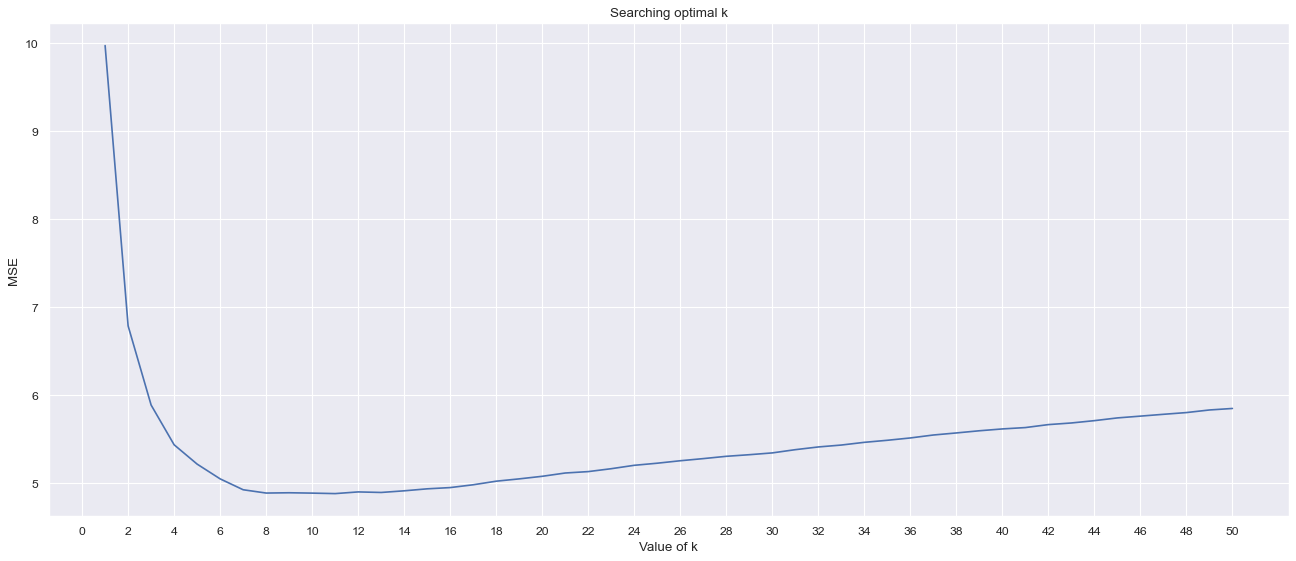

In [28]:
#using chart to visualize k and mse
figure(figsize=(20, 8), dpi=80)
plt.plot(range(1,51),error)
plt.title('Searching optimal k')
plt.xlabel('Value of k')
plt.xticks(np.arange(0, 51, step=2))
plt.ylabel('MSE')


The lowest MSE for k=11


In [29]:
#Testing model with this value
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
util.print_model_statistics(y_train, y_pred_train, y_test, y_pred_test)

Train MSE: 4.169342452611305
Test MSE: 5.02247735040548

Train R²: 0.8293512304851359
Test R²: 0.7869086042656095

Train MAE: 1.6062718928177893
Test MAE: 1.7601632993616303



### 2. Dataset - after feature selection  
Again cross validation method

In [30]:
error_dropped = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k) #we are searching best result for k in range of [1,50]
    y_pred_dropped = cross_val_predict(knn, X_cross_dropped, y_cross_dropped, cv=5)
    error_dropped.append(mean_squared_error(y_cross_dropped,y_pred_dropped))

Text(0, 0.5, 'MSE')

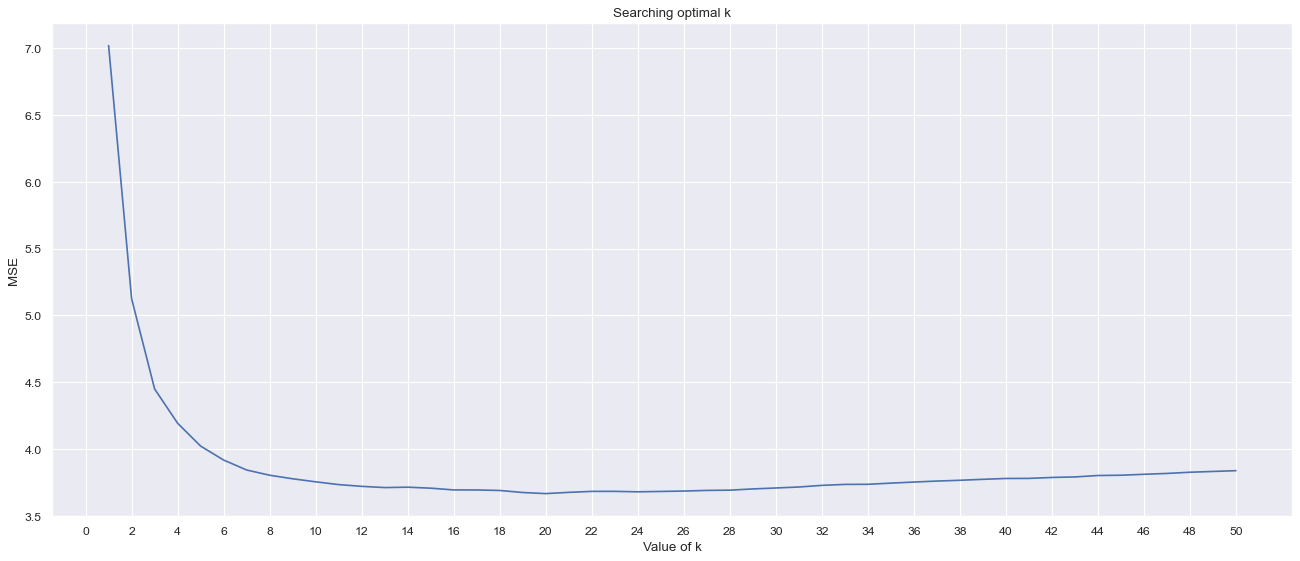

In [31]:
#using chart to visualize k and mse
figure(figsize=(20, 8), dpi=80)
plt.plot(range(1,51),error_dropped)
plt.title('Searching optimal k')
plt.xlabel('Value of k')
plt.xticks(np.arange(0, 51, step=2))
plt.ylabel('MSE')

The lowest MSE for k=20

In [32]:
#Testing model with this value
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train_dropped, y_train_dropped)
y_pred_train_dropped = knn.predict(X_train_dropped)
y_pred_test_dropped = knn.predict(X_test_dropped)
util.print_model_statistics(y_train_dropped, y_pred_train_dropped, y_test_dropped, y_pred_test_dropped)

Train MSE: 3.35653489556652
Test MSE: 3.641223572515746

Train R²: 0.8620647201192446
Test R²: 0.8476449585659587

Train MAE: 1.4821672627793596
Test MAE: 1.552432120387391



### 3.Trying scaling with dataset after feature selection

In [64]:
error_scaling = []
for k in range(1,51):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred_dropped = cross_val_predict(classifier_pipeline, X_cross_dropped, y_cross_dropped, cv=5)
    error_scaling.append(mean_squared_error(y_cross_dropped,y_pred_dropped))

Text(0, 0.5, 'MSE')

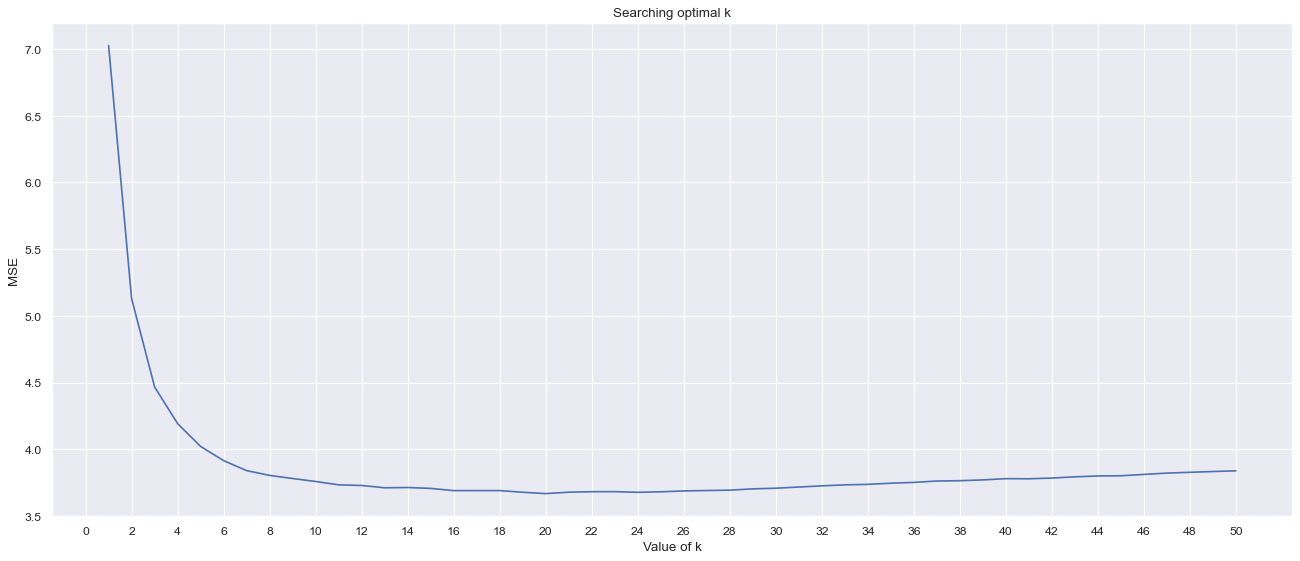

In [35]:
#using chart to visualize k and mse
figure(figsize=(20, 8), dpi=80)
plt.plot(range(1,51),error_scaling)
plt.title('Searching optimal k')
plt.xlabel('Value of k')
plt.xticks(np.arange(0, 51, step=2))
plt.ylabel('MSE')

The lowest MSE for k=20

In [37]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=20))
classifier_pipeline.fit(X_train_dropped, y_train_dropped)
y_pred_train_dropped = classifier_pipeline.predict(X_train_dropped)
y_pred_test_dropped = classifier_pipeline.predict(X_test_dropped)
util.print_model_statistics(y_train_dropped, y_pred_train_dropped, y_test_dropped, y_pred_test_dropped)

Train MSE: 3.3607820940563014
Test MSE: 3.639286662129857

Train R²: 0.8618901834227333
Test R²: 0.847726002219615

Train MAE: 1.4829854371085416
Test MAE: 1.55105439007329



## MLP Regressor
### Model description
* For simplicity the Model only consists of three layers:
  - One input layer with our 10 input features (also tried with the dropped columns)
  - One hidden layer with hidden nodes. To find the right amount of hidden nodes it was tested starting with 20 hidden nodes all the way up to 100 with stepsize 10. 
  - One output layer computing the real numbered value

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

### On standard data

In [39]:
error_data = []
for l in range(20,100,10):
    mlp = MLPRegressor(random_state = 1, max_iter=600, hidden_layer_sizes=l)
    y_pred = cross_val_predict(mlp, X_cross, y_cross, cv=5)
    mse = mean_squared_error(y_cross,y_pred)
    error_data.append(mse)
    print("nodes in hidden layer: " + str(l) +" MSE: "+ str(mse))

nodes in hidden layer: 20 MSE: 3.510757007433902
nodes in hidden layer: 30 MSE: 1.438889075531569
nodes in hidden layer: 40 MSE: 1.3073984667318617
nodes in hidden layer: 50 MSE: 2.6036904154342375
nodes in hidden layer: 60 MSE: 1.3184281015677224
nodes in hidden layer: 70 MSE: 1.1671436645075572
nodes in hidden layer: 80 MSE: 1.249393556015696
nodes in hidden layer: 90 MSE: 1.1178405076082936


### With dropped columns

In [40]:
error_dropped_columns = []
for l in range(20,100,10):
    mlp = MLPRegressor(random_state = 1, max_iter=600, hidden_layer_sizes=l)
    y_pred = cross_val_predict(mlp, X_cross_dropped, y_cross_dropped, cv=5)
    mse = mean_squared_error(y_cross_dropped,y_pred)
    error_dropped_columns.append(mse)
    print("nodes in hidden layer: " + str(l) +" MSE: "+ str(mse))

nodes in hidden layer: 20 MSE: 3.9223880205946653
nodes in hidden layer: 30 MSE: 3.425528939847076
nodes in hidden layer: 40 MSE: 3.3735453543326908
nodes in hidden layer: 50 MSE: 3.3821385197808445
nodes in hidden layer: 60 MSE: 3.3739463599718698
nodes in hidden layer: 70 MSE: 3.3578017070823107
nodes in hidden layer: 80 MSE: 3.3618610972454377
nodes in hidden layer: 90 MSE: 3.3408336361047937


### normal data with standard scaler

In [41]:
error_standard_scaler = []
for l in range(20,100,10):
    classifier_pipeline = make_pipeline(StandardScaler(), MLPRegressor(random_state = 1, max_iter=600, hidden_layer_sizes=l))
    y_pred = cross_val_predict(classifier_pipeline, X_cross, y_cross, cv=5)
    mse = mean_squared_error(y_cross,y_pred)
    error_standard_scaler.append(mse)
    print("nodes in hidden layer: " + str(l) +" MSE: "+ str(mse))

nodes in hidden layer: 20 MSE: 1.1991689519121937
nodes in hidden layer: 30 MSE: 1.1854258583486381
nodes in hidden layer: 40 MSE: 1.1759421597265267
nodes in hidden layer: 50 MSE: 1.1395316198927483
nodes in hidden layer: 60 MSE: 1.142514491852177
nodes in hidden layer: 70 MSE: 1.125985955165017
nodes in hidden layer: 80 MSE: 1.155151090265273
nodes in hidden layer: 90 MSE: 1.147017519783875


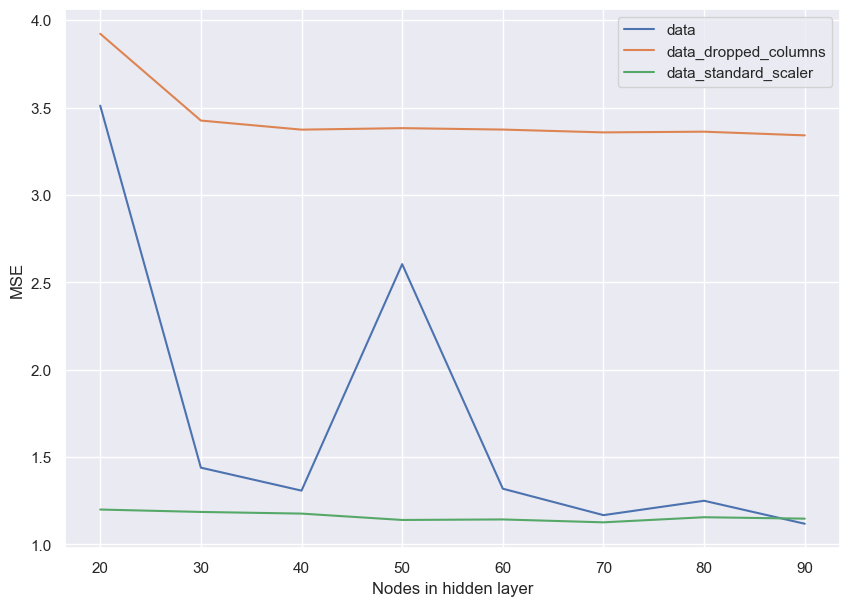

In [66]:
plt.plot(range(20,100,10),error_data, label= "data")
plt.plot(range(20,100,10),error_dropped_columns, label= "data_dropped_columns")
plt.plot(range(20,100,10),error_standard_scaler, label= "data_standard_scaler")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Nodes in hidden layer")
plt.show()


In [43]:
np.min([error_data, error_dropped_columns, error_standard_scaler])

1.1178405076082936

### best result on test data

In [77]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=600, hidden_layer_sizes=90).fit(X_train, y_train)
mlp_train = mlp.predict(X_train)
mlp_test = mlp.predict(X_test)
util.print_model_statistics(y_train,mlp_train , y_test, mlp_test)

Train MSE: 1.0617473148866037
Test MSE: 1.1166835255623977

Train R²: 0.9565432979227622
Test R²: 0.9526218568140521

Train MAE: 0.8242474732306797
Test MAE: 0.8368488998998346



## SVM
Epsilon-Support Vector Regression

Choose Kernel 

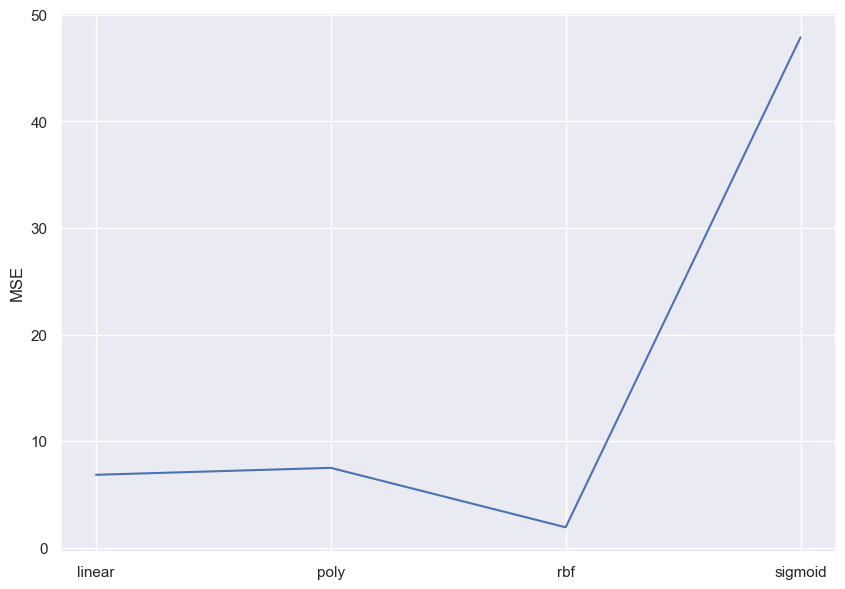

In [67]:
from sklearn.svm import SVR
mse = list()
for i in ["linear", "poly", "rbf", "sigmoid"]: 
    classifier_pipeline = make_pipeline(StandardScaler(), SVR(kernel = i))
    y_pred = cross_val_predict(classifier_pipeline, X_cross, y_cross, cv=5)
    mse.append(mean_squared_error(y_cross, y_pred))
plt.ylabel("MSE")
plt.plot(["linear", "poly", "rbf", "sigmoid"], mse)

Choose C

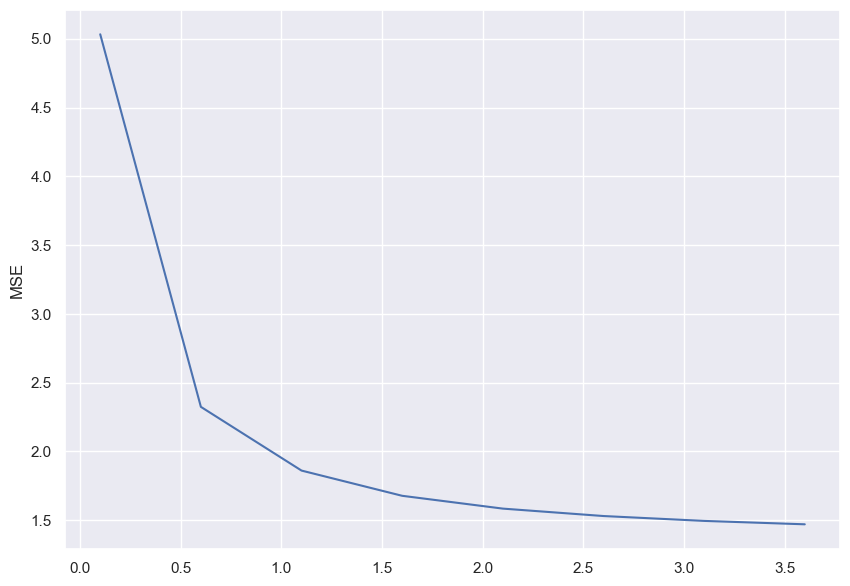

In [68]:
mse = list()
for i in np.arange(0.1, 4, 0.5): 
    classifier_pipeline = make_pipeline(StandardScaler(), SVR(kernel = "rbf", C=i))
    y_pred = cross_val_predict(classifier_pipeline, X_cross, y_cross, cv=5)
    mse.append(mean_squared_error(y_cross, y_pred))

plt.ylabel("MSE")
plt.plot(np.arange(0.1, 4, 0.5), mse)


Choose epsilon 

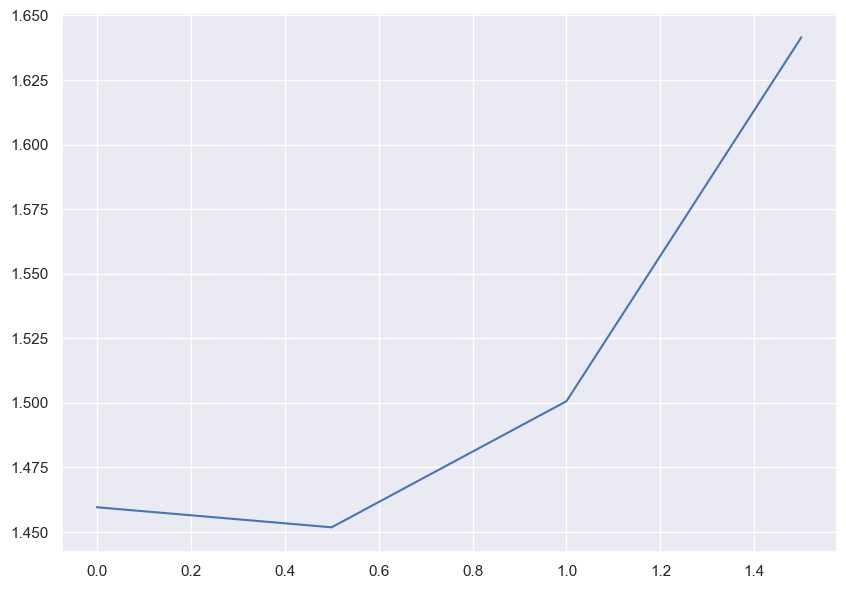

In [47]:
mse = list()
for i in np.arange (0, 2, 0.5): 
    classifier_pipeline = make_pipeline(StandardScaler(), SVR(kernel = "rbf", C=4, epsilon = i))
    y_pred = cross_val_predict(classifier_pipeline, X_cross, y_cross, cv=5)
    mse.append(mean_squared_error(y_cross, y_pred))
plt.ylabel("MSE")
plt.plot(np.arange(0, 2, 0.5), mse)

Choose gamma 

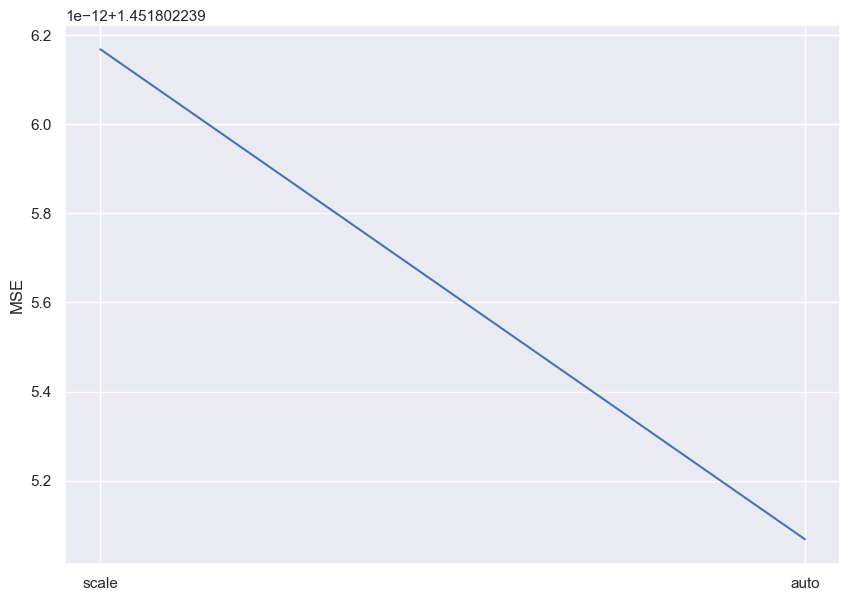

In [69]:
mse = list()
for i in ["scale", "auto"]: 
    classifier_pipeline = make_pipeline(StandardScaler(), SVR(kernel = "rbf", C=4, epsilon = 0.5, gamma = i))
    y_pred = cross_val_predict(classifier_pipeline, X_cross, y_cross, cv=5)
    mse.append(mean_squared_error(y_cross, y_pred))
plt.ylabel("MSE")
plt.plot(["scale", "auto"], mse)

### Perform model 

In [80]:
from sklearn import svm

svr = SVR(kernel = "rbf", C=4, epsilon = 0.5)
svr.fit(X_train, y_train)

svr_test = svr.predict(X_test)
svr_train = svr.predict(X_train)

util.print_model_statistics(y_train, svr_train, y_test, svr_test)

Train MSE: 1.0170118212897605
Test MSE: 1.4833106261510487

Train R²: 0.9583742957414133
Test R²: 0.9370667681341238

Train MAE: 0.7783434692903711
Test MAE: 0.9512543899969943



### With dropped columns 
When tuning the parameter again on the dropped dataset, the best model is following: 

In [84]:
svr = SVR(kernel = "rbf", C=4, epsilon = 1.5)
svr.fit(X_train_dropped, y_train_dropped)

svr_test_dropped = svr.predict(X_test_dropped)
svr_train_dropped = svr.predict(X_train_dropped)

util.print_model_statistics(y_train_dropped, svr_train_dropped, y_test_dropped, svr_test_dropped)

Train MSE: 3.1656264334427227
Test MSE: 3.259224469744176

Train R²: 0.8699100168237217
Test R²: 0.8636284564126231

Train MAE: 1.456566437415195
Test MAE: 1.4691446509759334



# Results and Summary
- Comparison of the best models
- Quality metrics & Visualisation
- Overfitting & Model complexity
- Discussion on results


## Comparison of the best models 

The best model was created with MLP-Regressor. It reached a MSE of 1.11. The second best model was created with Linear Regression using Polynomial Features. The MSE for this model was 1.13. The third best model was created with the Epsilon SVM which reached a MSE of 1.48 and the KNN reached a MSE of 3.63. 

It can be seen that MLP, Linear Regresseion with Polynomial Features of degree 3 and Epsilon SVM achieved better result then the KNN. 

### Linear Regression using Polynomial Features
Training a linear regression model with polynomial features of degree 3 results in an MSE of 1.13 on the validation set. Without the use of polynomial features, the MSE of the linear regression model is about 6.5 on the validation set. The inclusion of lasso regularization is not reasonable for this data set. It turned out that the best parameter for alpha = 0, which means that the model is better without lasso. Overall, the model performs better when the the entire data set is used, rather than using only the features with the highest correlation/significance. 

### KNN
We tested the KNN on 2 datasets: original data, the one with dropped columns (most important features), but we also create special model on this data which used scaling, so we had 3 models to evaluate. On orginal data for optimal k value we got mse about 5.00, while for dropped dataset 3.64. After using scaling mse error was 3.63, so a little bit lower. Only one parameter for KNN which we can tune is neighbors number (k), which was calculated with cross validation. 

### SVM

The best result that could be achieved with the SVM delivers an mse of 1.48. In total the model performed way better on the total dataset than the dropped dataset. When tuning the parameters, it can be seen that the rbf-kernel, C = 4, epsilon = 0.5 deliver the smallest mse.

### MLP
The best results for the MLP were achieved with 90 nodes in the hidden layer without feature scaling. Having a look at the plot of the errors, you can see that the validation with the dropped columns is by far the worse. The error results with the scaled data the MLP works very well with various amount of nodes in the hidden Layer. The MLP with the normal data is heavy depending on the number of nodes in the hidden layer, scoring the worst results with 20 and 50 nodes. Suprisingly the MLP performs the best with 90 nodes in the hidden layer with standard input.
The testing with the dropped columns does not make too much sense with the MLP because if they would have zero relevance to drop them, the weights would be zero anyways in the hidden connections.
With the crossvalidation the model is rather robust and the overfitting is not to big if you compare train and test metrics.

### Overfitting and Model complexity
To avoid overfitting the models were trained with cross-validation, regularization, and parameter tuning with grid search, among others. In these procedures, each provided its best model.

<BarContainer object of 4 artists>

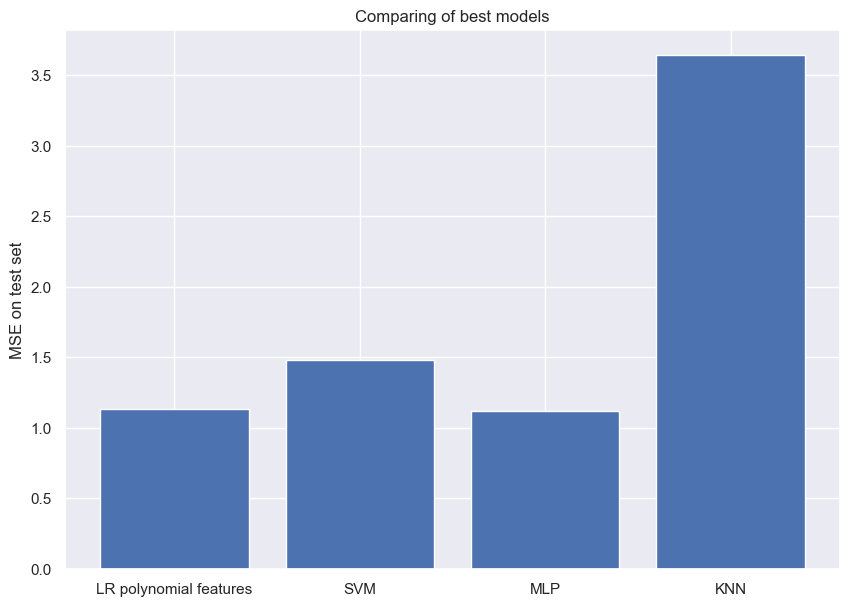

In [114]:
MSE_errors = [mean_squared_error(y_test, rf_test),mean_squared_error(y_test, svr_test),
              mean_squared_error(y_test, mlp_test),mean_squared_error(y_test_dropped, y_pred_test_dropped)]
Method_names = ["LR polynomial features", "SVM", "MLP", "KNN"]
plt.title("Comparing of best models")
plt.ylabel("MSE on test set")
plt.bar(Method_names, MSE_errors)

# Conclusion of project team
## Obstacles
- Working together with colab and loosing updates
- plotting in colab
- figuring out how to write scikit pipelines with grid search and cross validation


## Opinion in the dataset with preprocessing
- Dropping columns gave better results at the KNN but not for any of the other methods


## Opinion on results
- suprisingly good results, did not expect
- At beginning we were sure that SVM will be the worst method and KNN will perform as good as the others
    * as we found out, the KNN is by far the worst and SVM works better than expected
- MLP is not worth the computational effort when you compare it with the Linear Regression Model with polynomial features
    * results are almost the same, MLP needs more time for training and figuring out hyperparameters
- For linear regression with polynomial features the grid search helped a lot to find the best hyperparameters